In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pd.set_option('display.max_columns',None)
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Checking for Null Values

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.shape

(7043, 21)

<AxesSubplot:>

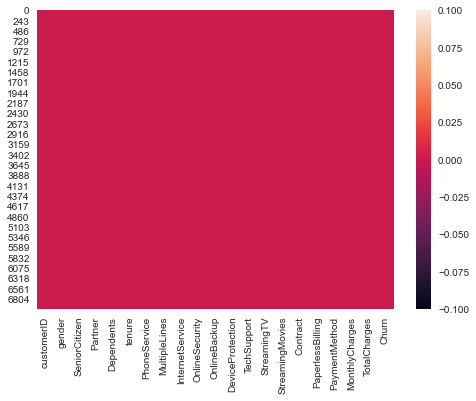

In [9]:
sns.heatmap(data = df.isnull())

In [10]:
df.dropna(inplace = True)

In [11]:
df.shape

(7043, 21)

In [12]:
df.duplicated().sum()

0

#### There is relatively no use of customer id.

In [13]:
df.drop(columns='customerID', inplace=True)

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### DATA Cleaning

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes',0:'No'})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<AxesSubplot:>

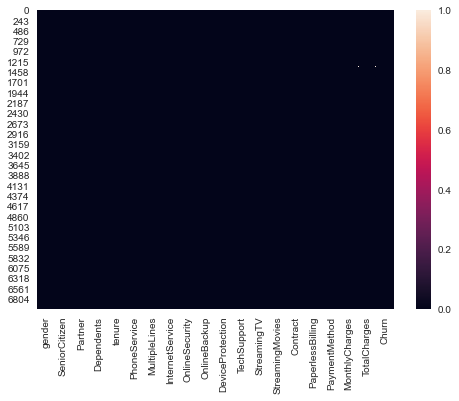

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Filling the null values with mean of all the values

In [19]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [20]:
df.shape

(7043, 20)

In [21]:
gender = df['gender'].value_counts()
gender

Male      3555
Female    3488
Name: gender, dtype: int64

In [22]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
print(df['MultipleLines'].value_counts())
print('\n')
print(df['InternetService'].value_counts())
print('\n')
print(df['OnlineSecurity'].value_counts())
print('\n')
print(df['OnlineBackup'].value_counts())
print('\n')
print(df['DeviceProtection'].value_counts())
print('\n')
print(df['TechSupport'].value_counts())
print('\n')
print(df['StreamingTV'].value_counts())
print('\n')
print(df['StreamingMovies'].value_counts())
print('\n')
print(df['Contract'].value_counts())
print('\n')
print(df['PaperlessBilling'].value_counts())
print('\n')
print(df['PaymentMethod'].value_counts())
print('\n')
print(df['Churn'].value_counts())


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


Month-to-month    3875
Two year          1695
One year          1473
N

In [24]:
SeniorCitizen = pd.get_dummies(df['SeniorCitizen'],drop_first=True)
SeniorCitizen.rename({'Yes':'SeniorCitizen'},axis=1, inplace = True)

gender = pd.get_dummies(df['gender'],drop_first=True)
gender.rename({'Male':'Male 1 female 0'},axis=1, inplace = True)

Partner = pd.get_dummies(df['Partner'],drop_first=True)
Partner.rename({'Yes':'Partner'},axis=1, inplace = True)

Dependents = pd.get_dummies(df['Dependents'],drop_first=True)
Dependents.rename({'Yes':'Dependents'},axis=1, inplace = True)

PhoneService = pd.get_dummies(df['PhoneService'],drop_first=True)
PhoneService.rename({'Yes':'PhoneService'},axis=1, inplace = True)

PaperlessBilling = pd.get_dummies(df['PaperlessBilling'],drop_first=True)
PaperlessBilling.rename({'Yes':'PaperlessBilling'},axis=1, inplace = True)

InternetService = pd.get_dummies(df['InternetService'])
InternetService.rename({'Yes':'InternetService'},axis=1, inplace = True)

Contract = pd.get_dummies(df['Contract'])
Contract.rename({'Yes':'Contract'},axis=1, inplace = True)

PaymentMethod = pd.get_dummies(df['PaymentMethod'])
PaymentMethod.rename({'Yes':'PaymentMethod'},axis=1, inplace = True)

Churn = pd.get_dummies(df['Churn'], drop_first= True)
Churn.rename({'Yes':'Churn'},axis=1, inplace = True)


In [25]:
MultipleLines = pd.get_dummies(df['MultipleLines'],drop_first=True)
MultipleLines.rename({'Yes':'MultipleLines'},axis=1, inplace = True)
MultipleLines.drop('No phone service',axis=1, inplace=True)

OnlineSecurity = pd.get_dummies(df['OnlineSecurity'],drop_first=True)
OnlineSecurity.rename({'Yes':'OnlineSecurity'},axis=1, inplace = True)
OnlineSecurity.drop('No internet service',axis=1, inplace=True)

OnlineBackup = pd.get_dummies(df['OnlineBackup'],drop_first=True)
OnlineBackup.rename({'Yes':'OnlineBackup'},axis=1, inplace = True)
OnlineBackup.drop('No internet service',axis=1, inplace=True)

DeviceProtection = pd.get_dummies(df['DeviceProtection'],drop_first=True)
DeviceProtection.rename({'Yes':'DeviceProtection'},axis=1, inplace = True)
DeviceProtection.drop('No internet service',axis=1, inplace=True)

StreamingTV = pd.get_dummies(df['StreamingTV'],drop_first=True)
StreamingTV.rename({'Yes':'StreamingTV'},axis=1, inplace = True)
StreamingTV.drop('No internet service',axis=1, inplace=True)


StreamingMovies = pd.get_dummies(df['StreamingMovies'],drop_first=True)
StreamingMovies.rename({'Yes':'StreamingMovies'},axis=1, inplace = True)
StreamingMovies.drop('No internet service',axis=1, inplace=True)

TechSupport = pd.get_dummies(df['TechSupport'],drop_first=True)
TechSupport.rename({'Yes':'TechSupport'},axis=1, inplace = True)
TechSupport.drop('No internet service',axis=1, inplace=True)



In [26]:
fresh_df = df.drop(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
        'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
        'PaymentMethod','Churn'], axis = 1)


In [27]:
fresh_df = pd.concat([fresh_df,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,
                     DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn], axis = 1)

fresh_df

,tenure,MonthlyCharges,TotalCharges,Male 1 female 0,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,DSL,Fiber optic,No,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Month-to-month,One year,Two year,PaperlessBilling,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Churn
0,1,29.85,29.85,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,1,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0
7039,72,103.20,7362.90,0,0,1,1,1,1,0,1,0,0,1,1,0,1,1,0,1,0,1,0,1,0,0,0
7040,11,29.60,346.45,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
7041,4,74.40,306.60,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1


In [28]:
fresh_df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Male 1 female 0',
       'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'DSL', 'Fiber optic', 'No', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Month-to-month', 'One year', 'Two year',
       'PaperlessBilling', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Electronic check', 'Mailed check', 'Churn'],
      dtype='object')

In [29]:
X = fresh_df.drop('Churn', axis=1)


In [30]:
y = fresh_df['Churn']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
X_train

array([[ 0.30741281,  0.32802721,  0.32019155, ..., -0.52256167,
         1.39928329, -0.54027294],
       [-0.9165312 , -1.16355736, -0.89735199, ..., -0.52256167,
        -0.71465157,  1.85091631],
       [-0.22296293, -1.50624106, -0.78880736, ..., -0.52256167,
        -0.71465157,  1.85091631],
       ...,
       [-0.83493493, -1.44002198, -0.87494619, ..., -0.52256167,
         1.39928329, -0.54027294],
       [-0.83493493,  1.15245465, -0.48059528, ..., -0.52256167,
         1.39928329, -0.54027294],
       [-0.26376106, -1.48471986, -0.80823601, ...,  1.91364974,
        -0.71465157, -0.54027294]])

# Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
classifier = LogisticRegression()

In [39]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_prediction = classifier.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(confusion_matrix(y_test,y_prediction))
print('\n')
print(classification_report(y_test,y_prediction))

[[1530  167]
 [ 258  370]]


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1697
           1       0.69      0.59      0.64       628

    accuracy                           0.82      2325
   macro avg       0.77      0.75      0.76      2325
weighted avg       0.81      0.82      0.81      2325



# KNN MODEL

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=35)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [44]:
y_pred_knn = classifier_knn.predict(X_test)

In [45]:
print(confusion_matrix(y_test, y_pred_knn))
print('\n')
print(classification_report(y_test, y_pred_knn))

[[1496  201]
 [ 251  377]]


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1697
           1       0.65      0.60      0.63       628

    accuracy                           0.81      2325
   macro avg       0.75      0.74      0.75      2325
weighted avg       0.80      0.81      0.80      2325



In [46]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

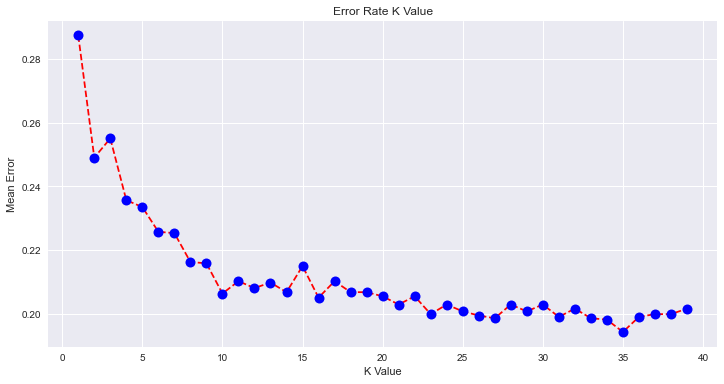

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Decision Tree Model

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtree = DecisionTreeClassifier()

In [50]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
dtree_prediction = dtree.predict(X_test)

In [52]:
print(confusion_matrix(y_test,dtree_prediction))
print('\n')
print(classification_report(y_test,dtree_prediction))

[[1382  315]
 [ 301  327]]


              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1697
           1       0.51      0.52      0.51       628

    accuracy                           0.74      2325
   macro avg       0.67      0.67      0.67      2325
weighted avg       0.74      0.74      0.74      2325



# Random Forest Model

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier()

In [55]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
rfc_prediction = rfc.predict(X_test)

In [57]:
print(confusion_matrix(y_test,dtree_prediction))
print('\n')
print(classification_report(y_test,dtree_prediction))

[[1382  315]
 [ 301  327]]


              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1697
           1       0.51      0.52      0.51       628

    accuracy                           0.74      2325
   macro avg       0.67      0.67      0.67      2325
weighted avg       0.74      0.74      0.74      2325



# Deep Learning Model

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [59]:
model = Sequential()

In [60]:
model = Sequential()

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(12, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [61]:
model.fit(x=X_train,y=y_train,
         epochs=50,
         batch_size = 200,
         validation_data=(X_test,y_test))

Epoch 1/50
24/24 [==============================] - 18s 80ms/step - loss: 0.6017 - val_loss: 0.4856
Epoch 2/50
24/24 [==============================] - 0s 6ms/step - loss: 0.5069 - val_loss: 0.4466
Epoch 3/50
24/24 [==============================] - 0s 6ms/step - loss: 0.4778 - val_loss: 0.4297
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4735 - val_loss: 0.4247
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4605 - val_loss: 0.4205
Epoch 6/50
24/24 [==============================] - 0s 7ms/step - loss: 0.4552 - val_loss: 0.4182
Epoch 7/50
24/24 [==============================] - 0s 7ms/step - loss: 0.4576 - val_loss: 0.4201
Epoch 8/50
24/24 [==============================] - 0s 6ms/step - loss: 0.4474 - val_loss: 0.4179
Epoch 9/50
24/24 [==============================] - 0s 8ms/step - loss: 0.4499 - val_loss: 0.4180
Epoch 10/50
24/24 [==============================] - 0s 8ms/step - loss: 0.4430 - val_loss: 0.4181
Epoch 11/50
24/24

In [62]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

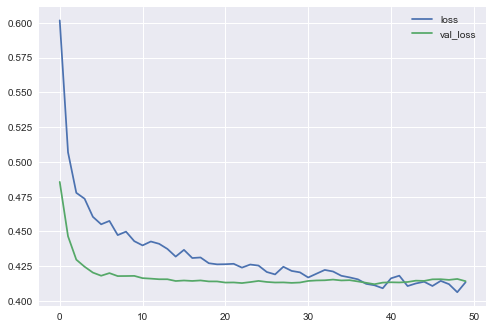

In [63]:
losses[['loss','val_loss']].plot()

In [64]:
keras_predictions = model.predict(X_test)

In [65]:
print(confusion_matrix(y_test,dtree_prediction))
print('\n')
print(classification_report(y_test,dtree_prediction))

[[1382  315]
 [ 301  327]]


              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1697
           1       0.51      0.52      0.51       628

    accuracy                           0.74      2325
   macro avg       0.67      0.67      0.67      2325
weighted avg       0.74      0.74      0.74      2325



In [66]:
single_cx = fresh_df.drop('Churn',axis=1).iloc[0]
single_cx

tenure                        1.00
MonthlyCharges               29.85
TotalCharges                 29.85
Male 1 female 0               0.00
SeniorCitizen                 0.00
Partner                       1.00
Dependents                    0.00
PhoneService                  0.00
MultipleLines                 0.00
DSL                           1.00
Fiber optic                   0.00
No                            0.00
OnlineSecurity                0.00
OnlineBackup                  1.00
DeviceProtection              0.00
TechSupport                   0.00
StreamingTV                   0.00
StreamingMovies               0.00
Month-to-month                1.00
One year                      0.00
Two year                      0.00
PaperlessBilling              1.00
Bank transfer (automatic)     0.00
Credit card (automatic)       0.00
Electronic check              1.00
Mailed check                  0.00
Name: 0, dtype: float64

In [67]:
single_cx = scaler.transform(single_cx.values.reshape(-10,26))

In [68]:
single_cx

array([[-1.28371441, -1.15196902, -0.99676671, -1.032315  , -0.43441055,
         1.02925348, -0.66113555, -3.09874929, -0.86490163,  1.38157686,
        -0.87732116, -0.53306562, -0.63245553,  1.37382419, -0.71329823,
        -0.63738475, -0.79424999, -0.80279227,  0.91695777, -0.52223297,
        -0.56576456,  0.84043388, -0.53339345, -0.52256167,  1.39928329,
        -0.54027294]])

In [69]:
model.predict(single_cx)

array([[0.5151096]], dtype=float32)

In [70]:
fresh_df.head(10)

,tenure,MonthlyCharges,TotalCharges,Male 1 female 0,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,DSL,Fiber optic,No,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Month-to-month,One year,Two year,PaperlessBilling,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Churn
0,1,29.85,29.85,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
5,8,99.65,820.50,0,0,0,0,1,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,1,0,1
6,22,89.10,1949.40,1,0,0,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0
7,10,29.75,301.90,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8,28,104.80,3046.05,0,0,1,0,1,1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,1,0,1
9,62,56.15,3487.95,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0
